Bounding box before scaling = 27.7 mm x 20.6 mm
Bounding box after scaling = 17.0 mm x 10.0 mm


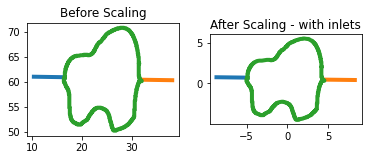

In [2]:
from fracprint import processor
from fracprint import writer

# Parameters to vary
filename = 'test_squiggle.csv'       # Name of the file you're loading
x_dim, y_dim = 17., 10.       # x, y dimensions of the container you're printing into
x_trans, y_trans = 0., 0.    # Distance by which to translate the pattern
inlet_d = 0.                 # Length of the inlet / outlet ports in mm
res = 0.1  # Pattern resolution in mm

x_all_shift, y_all_shift = processor.shape_prep(filename, x_dim, y_dim, inlet_d, x_trans, y_trans, res)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



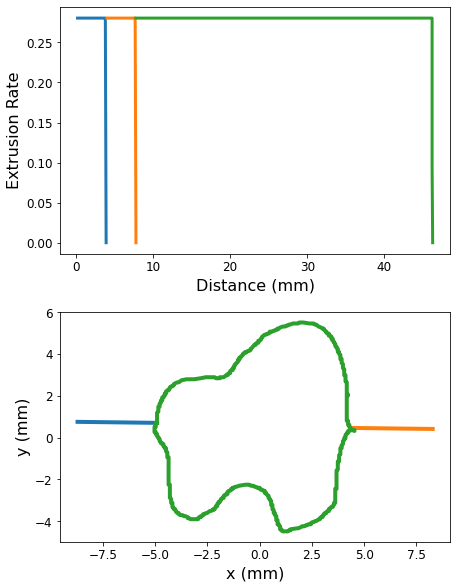

In [3]:
# Now convert to gcode including E and F values
v = 0.25              # cm / s - printhead speed
d = 1.0               # mm - fibril diameter
exp = 0.5             # power law exponent in flow decay at end of shape (Suggested value: exp <= 1)
dist = 0.1             # Distance in mm over which to reduce flow rate
floor = -61           # Lowest point on print
roof = -40            # Highest point on print
preex = 4.0           # Volume to pre-extrude on first shape
init = 0.0            # Amount to pre-extrude later shapes
term = 0.0            # Amount to post-extrude
retract = 0.0         # Amount to retract between shapes
alpha = 357           # E = \alpha V - value for 1 mm Hamilton gastight syringe
extrusion_on = True   # True = Extrusion on; False = Extrusion off

writer.gcode(x_all_shift, y_all_shift, res, inlet_d, filename, v, d, exp, dist, floor, roof, preex, init, term, retract, alpha, extrusion_on)
